<a href="https://colab.research.google.com/github/AgustinaLorda/FDSFE_ALorda/blob/main/HW8/%20HW8_Instructions_NN101_MNISTprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this homework is to create three neural network to solve the same problem and compare the performance of each. The problem is the classic prediction of hand written digits. We use the MNIST benchmark dataset which contains 60,000 images of handwritten digits and the corresponding labels

In [74]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [90]:
#download the data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [91]:
# how many labels are available?
y_train.shape

(60000,)

In [92]:
#what is the shape of the postage stamps that constitute the dataset?
x_train.shape

(60000, 28, 28)

This dataset has 60000 postage stamps.

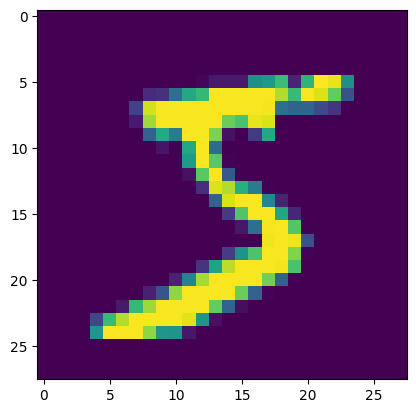

In [93]:
# show the first input data object

plt.imshow(x_train[0])

In [94]:
# check how many possible values are in the target variable
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

There are 10 possible values in the target variable

In [95]:
# check what is the minimum and maximum value and data type of the features dataset
x_train.min(), x_train.max(), x_train.dtype

(0, 255, dtype('uint8'))

The minimum value in the features dataset is 0, the maximum value is 255, and the data type is uint8

In [96]:
# scale the imput data so that it is min=0 and max=1 (min-max scaling) and that the values are floating point objects
x_train = x_train/255.0
x_test = x_test/255.0

In [97]:
# the shape should have not changed
x_train.shape

(60000, 28, 28)

In [98]:
#the number of pixels in the data is
28*28

784

# Build the first Artificial Neural Network
solve the problem as a regression - see slides for the appropriate choices

- use dense layers
- choose the right number of neurons in output to solve a _regression_ problem
- choose the right activation function on the last layer for a _regression_ problem
- chose the right loss function for a _regression_ problem


In [99]:
# architecture hyperparametrs
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
# add 1 dense layer with 128 neurons and relu activation function
# add 1 dropout layers dropping 20% of the connections
# add 1 dense layer with 10 neurons
# add the output  layer with 1
# your code goes here
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(1))

model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,781 (397.58 KB)

 Trainable params: 101,781 (397.58 KB)

 Non-trainable params: 0 (0.00 B)

The model has 101,781 trainable parameters and features a Flatten layer for input processing, a Dense layer with 128 neurons activated by ReLU, and a Dropout layer removing 20% of the connections. It also includes a Dense layer with 10 neurons and ends with a single-neuron output layer.

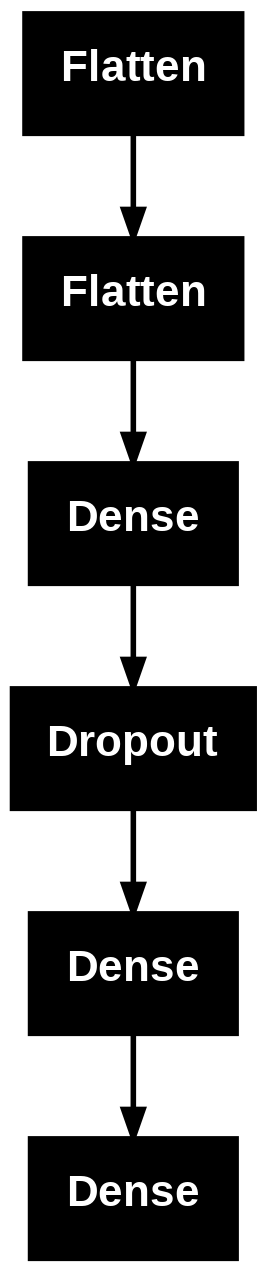

In [100]:
tf.keras.utils.plot_model(model)

In [101]:
# training hyperparameter
# choose the MeanSquaredError and Adam as the optimizer

loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam()

In [102]:
#The early_stopping callback is used to stop training when the validation loss stops improving for a set number of epochs.
#Prevents overfitting and ensures the model retains the best weights for optimal performance.
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True )

In [103]:
#train the model (did you make sure you are using GPUs??)
model.compile(optimizer = optimizer, loss = loss_fn,
              metrics=['accuracy'])
training_history = model.fit(x_train, y_train, epochs=500, callbacks=[early_stopping], validation_split=0.1)

Epoch 1/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1451 - loss: 3.1578 - val_accuracy: 0.1550 - val_loss: 1.0903
Epoch 2/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1446 - loss: 1.4355 - val_accuracy: 0.1638 - val_loss: 1.0393
Epoch 3/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1494 - loss: 1.2140 - val_accuracy: 0.1642 - val_loss: 0.8596
Epoch 4/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1507 - loss: 1.0894 - val_accuracy: 0.1523 - val_loss: 0.8272
Epoch 5/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1531 - loss: 1.0303 - val_accuracy: 0.1597 - val_loss: 0.8012
Epoch 6/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1545 - loss: 0.9830 - val_accuracy: 0.1618 - val_loss: 0.7760
Epoch 7/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1526 - loss: 0.9602 - val_accuracy: 0.1772 - val_loss: 0.7370
Epoch 8/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1566 - loss: 0

the training_history object contains the loss curves: training loss as `training_history.history["loss"]` and validation loss as `training_history.history["val_loss"]` (note the validation_split argument to model.fit set to 10%).

Show the training and validation losses and comment: is the model overfitting? at what epoch did it start to overfit?

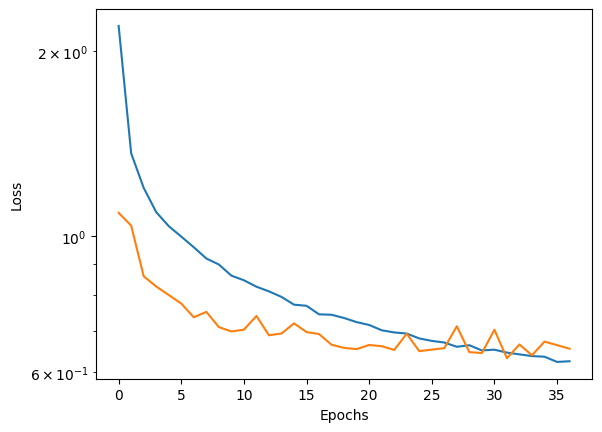

In [104]:
plt.plot(training_history.history["loss"])
plt.plot(training_history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.yscale('log')

Yes, the model is overfitting.Based on the plot above, it appears that the model starts to overfit around Epoch 20

In [ ]:
# is this model overfitting? how woudl you find out? how would you fix it?

Yes, the model is overfitting. The model is starting to overfit around epoch 20. The training loss continues to decrease, but the validation loss starts increasing after this point, indicating the model is becoming more specialized to the training data and losing the ability to generalize well to new, unseen data. To address this overfitting, some potential solutions include cross-validation, reducing model complexity and gathering more training data.

In [105]:
#what is the accuracy of the model? use model.evaluat to assess it

model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1730 - loss: 0.8018


[0.7165496349334717, 0.1793999969959259]

The accuracy of the model 17.9%. This indicates that the model is only correct about 17.37% of the time when tested on the provided x_test and y_test data.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
Data point 1:
  Actual label: 7
  Predicted value: 7.222843170166016


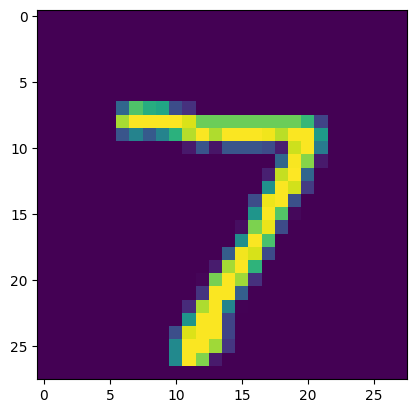

Data point 2:
  Actual label: 2
  Predicted value: 1.9727531671524048


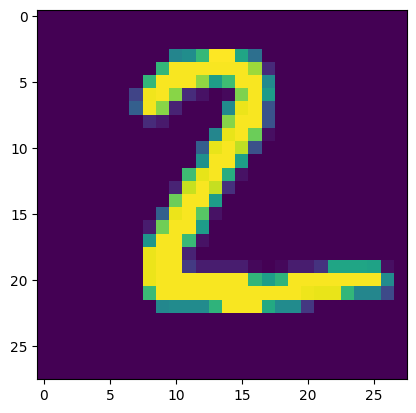

Data point 3:
  Actual label: 1
  Predicted value: 1.304566740989685


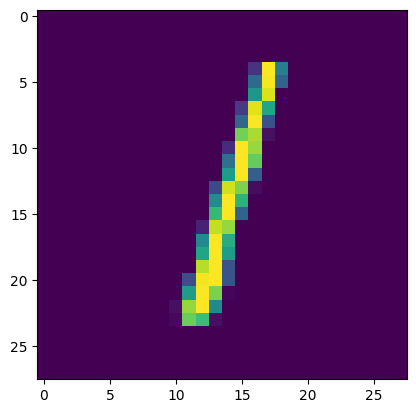

Data point 4:
  Actual label: 0
  Predicted value: -0.21492695808410645


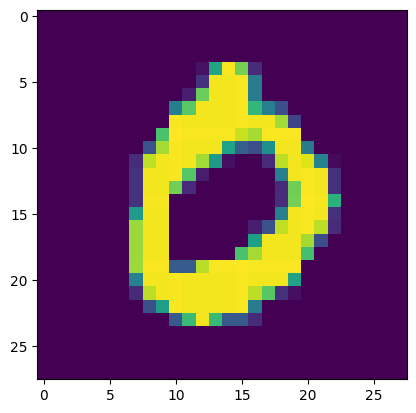

Data point 5:
  Actual label: 4
  Predicted value: 4.548368453979492


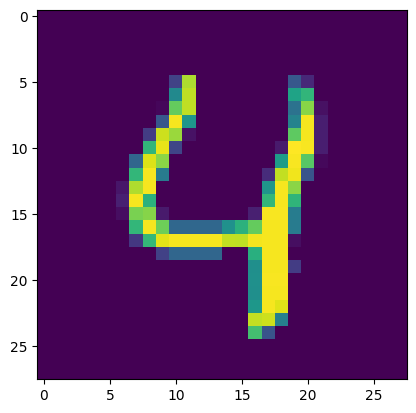

In [106]:
# show the first 5 data points and corresponding predictions
predictions = model.predict(x_test[:5])

for i in range(5):
  print(f"Data point {i+1}:")
  print(f"  Actual label: {y_test[i]}")
  print(f"  Predicted value: {predictions[i][0]}")
  plt.imshow(x_test[i])
  plt.show()



In [107]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

# Build a ANN to solve the problem as a multiclass classification

see slides for the apprioriate choices
- use dense layers
- choose the right number of neurons in output to solve a multiclass classification problem
- choose the right activation function on the last layer for a multiclass classification problem
- choose the right loss function for a multiclass classification problem

In [108]:
# modify the architecture hyperparametrs
# set the last layer to a 10 nerons dense layer and set the softmax as the activation function for the last layer
prob_model = tf.keras.models.Sequential()
# add 1 dense layer with 128 neurons and relu activation function
# add 1 dropout layers dropping 20% of the connections
# add 1 dense layer at the end, how many neurons?
# your code goes here
prob_model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
prob_model.add(tf.keras.layers.Dense(128, activation='relu'))
prob_model.add(tf.keras.layers.Dropout(0.2))
prob_model.add(tf.keras.layers.Dense(10, activation='softmax'))
prob_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_12 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

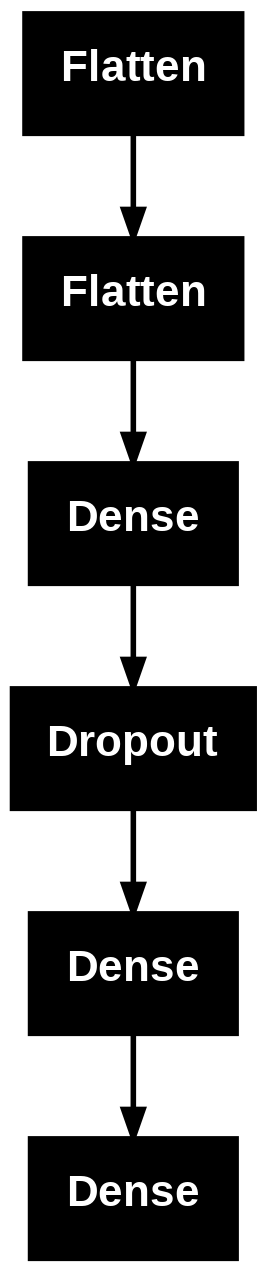

In [109]:
tf.keras.utils.plot_model(model)

In [110]:
#set the loss to be approprpate for the classification, the optimizer to Adam and compile and fit as before
# NOTE: you can either use the Sparse Categorical Loss and leave the labels as they are or use the Categorical Loss but modify the labels to be one-hot-encoded (see slides from class on trees!)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
prob_model.compile(optimizer = optimizer, loss = loss, metrics=['accuracy'])
prob_training_history = prob_model.fit(x_train, y_train, epochs=500, callbacks=[early_stopping], validation_split=0.1)

Epoch 1/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8555 - loss: 0.5003 - val_accuracy: 0.9647 - val_loss: 0.1303
Epoch 2/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9520 - loss: 0.1634 - val_accuracy: 0.9732 - val_loss: 0.0883
Epoch 3/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9642 - loss: 0.1183 - val_accuracy: 0.9758 - val_loss: 0.0838
Epoch 4/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9730 - loss: 0.0880 - val_accuracy: 0.9793 - val_loss: 0.0736
Epoch 5/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9754 - loss: 0.0749 - val_accuracy: 0.9802 - val_loss: 0.0688
Epoch 6/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9772 - loss: 0.0678 - val_accuracy: 0.9795 - val_loss: 0.0665
Epoch 7/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9818 - loss: 0.0576 - val_accuracy: 0.9802 - val_loss: 0.0689
Epoch 8/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9835 - loss: 0

In [111]:
#what is the accuracy of the model? use model.evaluat to assess it
prob_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9731 - loss: 0.0812


[0.0710953027009964, 0.9761999845504761]

The model accuracy is 97.6%

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
Data point 1:
  Actual label: 7
  Predicted label: 7


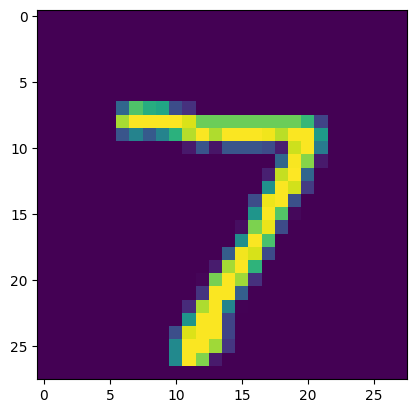

Data point 2:
  Actual label: 2
  Predicted label: 2


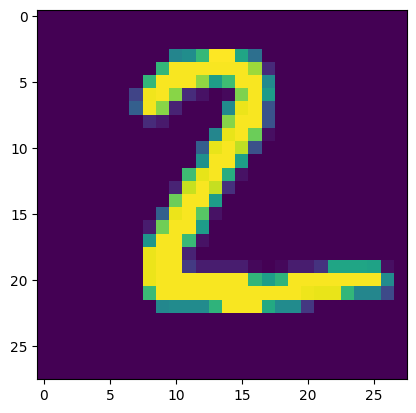

Data point 3:
  Actual label: 1
  Predicted label: 1


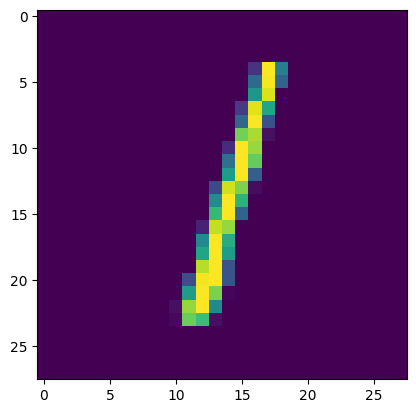

Data point 4:
  Actual label: 0
  Predicted label: 0


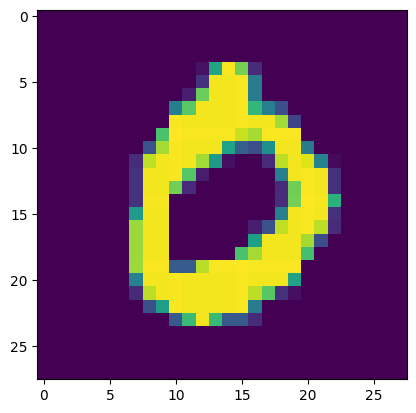

Data point 5:
  Actual label: 4
  Predicted label: 4


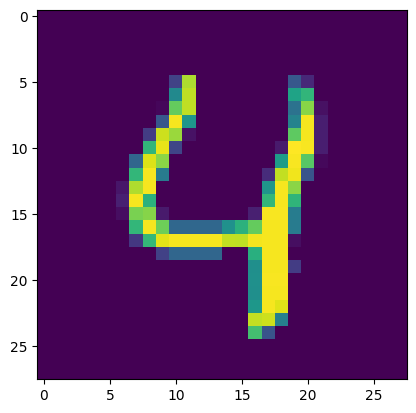

Data point 6:
  Actual label: 1
  Predicted label: 1


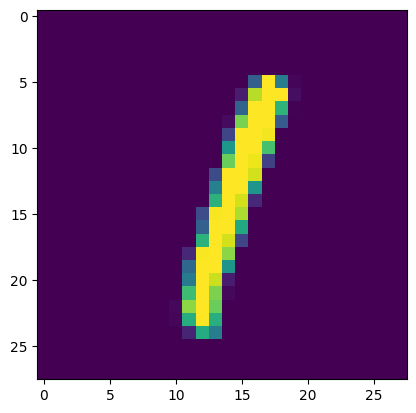

Data point 7:
  Actual label: 4
  Predicted label: 4


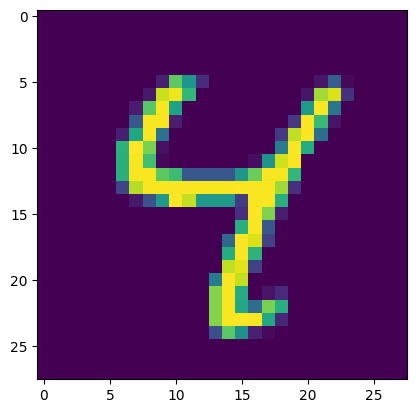

Data point 8:
  Actual label: 9
  Predicted label: 9


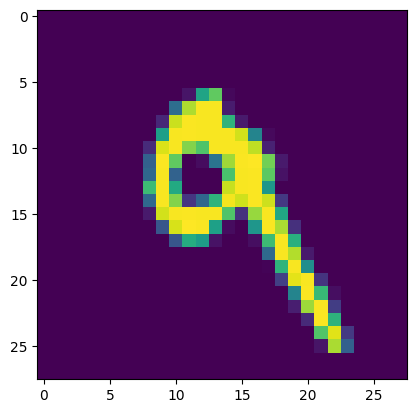

Data point 9:
  Actual label: 5
  Predicted label: 6


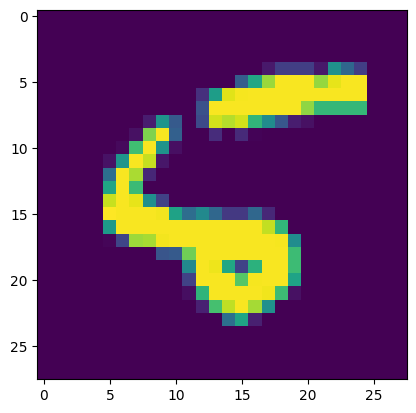

Data point 10:
  Actual label: 9
  Predicted label: 9


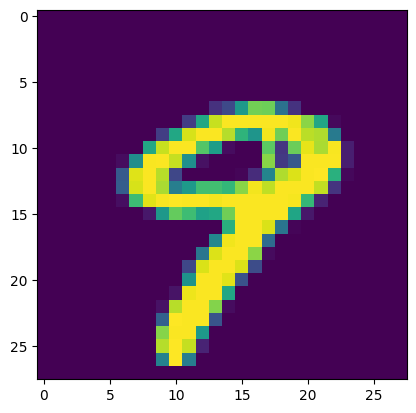

In [112]:
# show the first 10 data points and corresponding predictions
predictions = prob_model.predict(x_test[:10])

for i in range(10):
    print(f"Data point {i+1}:")
    print(f"  Actual label: {y_test[i]}")
    print(f"  Predicted label: {np.argmax(predictions[i])}")
    plt.imshow(x_test[i])
    plt.show()

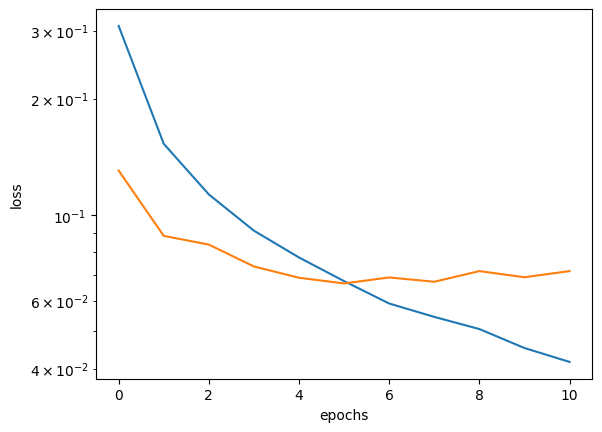

In [113]:
#show the loss curves and comment
plt.plot(prob_training_history.history["loss"])
plt.plot(prob_training_history.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.yscale('log') #use log scale for the y axis


The model is not overfitting, but is underfitting. The training and validation loss curves are both high and relatively close together, indicating that the model has not learned the underlying patterns in the data.This suggests that the model is too simple to capture the complexities of the problem. Increasing the model's complexity, such as adding more layers or neurons, or training it for longer, could help to improve its performance

# Build a CNN (convolutional neural network) to solve the problem as a multiclass classification

- you do not need the Flatten() layer anymore, the input size is not 728 but (28,28)
- use Conv2D layers and MaxPool2D layers alternating them appropriately
- use relu activation functions for the convolutional layers
- add a dense layer at the end for the prediction
- choose the right number of neurons in output to solve a multiclass classification problem
- choose the right activation function on the last layer for a multiclass classification problem
- choose the right loss function for a multiclass classification problem

In [114]:
model3 = tf.keras.models.Sequential()
# First convolutional layer
model3.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model3.add(tf.keras.layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model3.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(tf.keras.layers.MaxPooling2D((2, 2)))
# Fully connected dense layer
model3.add(tf.keras.layers.Dense(64, activation='relu'))
model3.add(tf.keras.layers.GlobalAveragePooling2D())
# Output layer with softmax activation for multiclass classification
model3.add(tf.keras.layers.Dense(10, activation='softmax'))
model3.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 5, 5, 64)            │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,626 (92.29 KB)

 Trainable params: 23,626 (92.29 KB)

 Non-trainable params: 0 (0.00 B)

In [115]:
#set the loss to be approprpate for the classification, the optimizer to Adam and compile and fit as before
# NOTE: you can either use the Sparse Categorical Loss and leave the labels as they are or use the Categorical Loss but modify the labels to be one-hot-encoded (see slides from class on trees!)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
model3.compile(optimizer = optimizer, loss = loss, metrics=['accuracy'])
CNN_training_history = model3.fit(x_train, y_train, epochs=500, callbacks=[early_stopping], validation_split=0.1)

Epoch 1/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5722 - loss: 1.2857 - val_accuracy: 0.8957 - val_loss: 0.3458
Epoch 2/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8979 - loss: 0.3414 - val_accuracy: 0.9355 - val_loss: 0.2204
Epoch 3/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9223 - loss: 0.2519 - val_accuracy: 0.9508 - val_loss: 0.1701
Epoch 4/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9366 - loss: 0.2113 - val_accuracy: 0.9447 - val_loss: 0.1756
Epoch 5/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9448 - loss: 0.1844 - val_accuracy: 0.9643 - val_loss: 0.1235


In [116]:
#what is the accuracy of the model? use model.evaluat to assess it
model3.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8655 - loss: 0.4124


[0.3553776741027832, 0.8858000040054321]

The model accuracy is 88.5%

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Data point 1:
  Actual label: 7
  Predicted label: 7


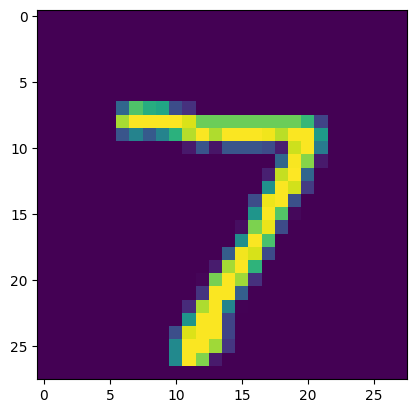

Data point 2:
  Actual label: 2
  Predicted label: 2


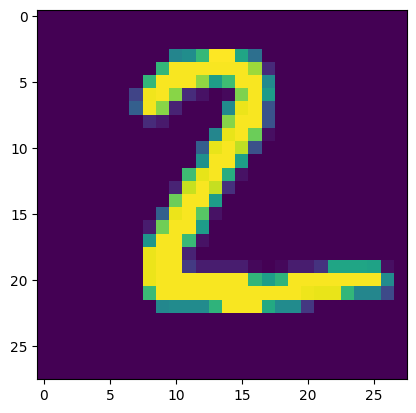

Data point 3:
  Actual label: 1
  Predicted label: 1


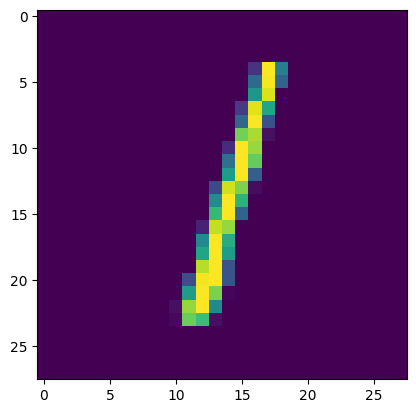

Data point 4:
  Actual label: 0
  Predicted label: 0


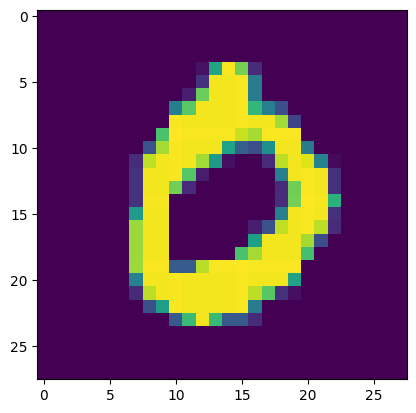

Data point 5:
  Actual label: 4
  Predicted label: 4


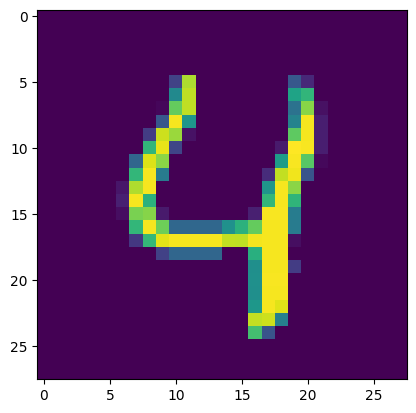

Data point 6:
  Actual label: 1
  Predicted label: 1


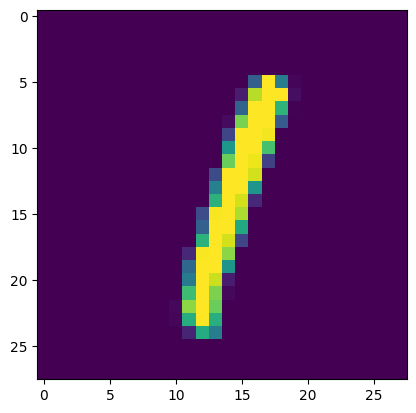

Data point 7:
  Actual label: 4
  Predicted label: 4


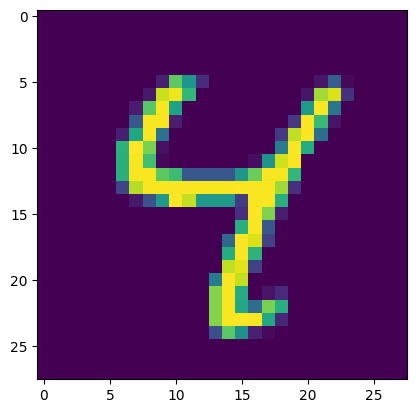

Data point 8:
  Actual label: 9
  Predicted label: 9


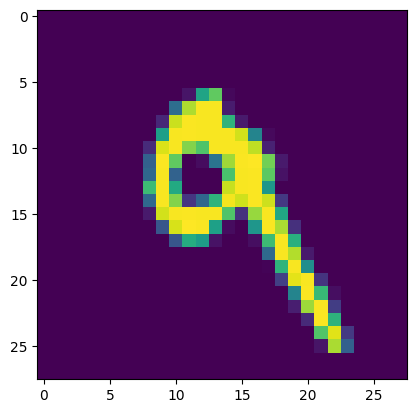

Data point 9:
  Actual label: 5
  Predicted label: 6


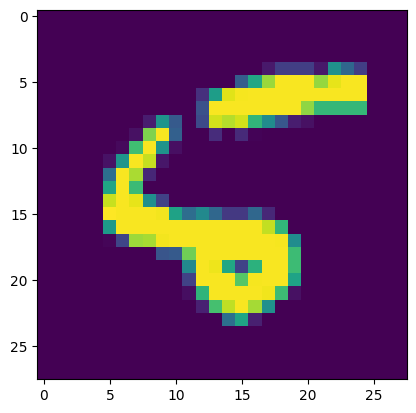

Data point 10:
  Actual label: 9
  Predicted label: 9


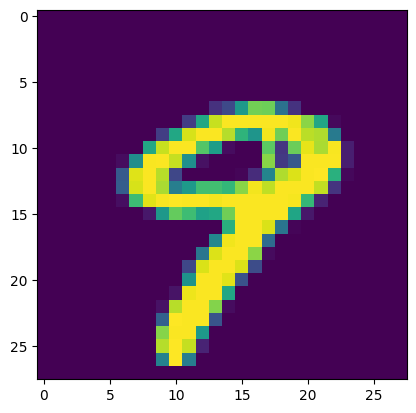

In [118]:
# show the first 10 data points and corresponding predictions
predictions = prob_model.predict(x_test[:10])

for i in range(10):
    print(f"Data point {i+1}:")
    print(f"  Actual label: {y_test[i]}")
    print(f"  Predicted label: {np.argmax(predictions[i])}")
    plt.imshow(x_test[i])
    plt.show()

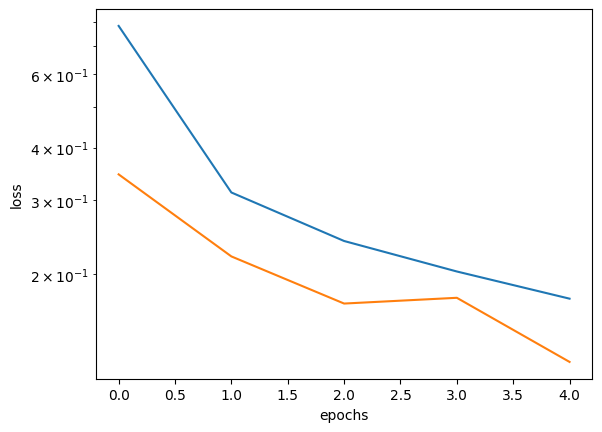

In [119]:
#show the loss curves and comment
plt.plot(CNN_training_history.history["loss"])
plt.plot(CNN_training_history.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.yscale('log') #use log scale for the y axis


The model is neither overfitting nor underfitting. It is learning effectively and generalizing well to the validation data.